# Libraries

In [34]:
# Import basic libraries
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Utils

## Random Seed

In [35]:
# Set the random seed for reproducibility
random_seed = 10
np.random.seed(random_seed)

## Preprocessing function

In [36]:
# Preprocessing function 
def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    
    # Correct the spelling mistakes
    text = re.sub(r" \b(luv) \b", "love", text)
    text = re.sub(r"\b(amzing) \b", "amazing", text)
    text = re.sub(r"\b(terible) \b", "terrible", text)
    text = re.sub(r"\b(excelent) \b", "excellent", text)
    text = re.sub(r"\b(performnce) \b", "performance", text)
    text = re.sub(r"\b(gud)\b", "good", text)
    text = re.sub(r"\b(vry)\b", "very", text)
    text = re.sub(r"\b(fantstic)\b", "fantastic", text)
    text = re.sub(r"\b(gr8)\b", "great", text)
    text = re.sub(r"\b(i'm)\b", "i am", text)
    text = re.sub(r"\b(horrble)\b", "horrible", text)
    text = re.sub(r"\b(don't)\b", "do not", text)
    text = re.sub(r"\b(did't)\b", "did not", text)
    text = re.sub(r"\b(dont)\b", "do not", text)
    text = re.sub(r"\b(didnt)\b", "did not", text)
    text = re.sub(r"\b(gotta)\b", "got to", text)
    text = re.sub(r"\b(waitin)\b", "waiting", text)
    text = re.sub(r"\b(thru)\b", "through", text)
    text = re.sub(r"\b('re)\b", "are", text)
    text = re.sub(r"\b(sis)\b", "sister", text)
    text = re.sub(r"\b(u)\b", "you", text)
    text = re.sub(r"\b(yeah)\b", "yes", text)
    text = re.sub(r"\b(yeh)\b", "yes", text)
    text = re.sub(r"\b(outta)\b", "out of", text)
    text = re.sub(r"\b(yah)\b", "you", text)
    text = re.sub(r"\b(foun)\b", "found", text)
    text = re.sub(r"\b(yah)\b", "you", text)
    text = re.sub(r"\b(ur)\b", "you are", text)
    text = re.sub(r"\b(sumtimes)\b", "sometimes", text)
    text = re.sub(r"\b(can't)\b", "can not", text)
    text = re.sub(r"\b(cannot)\b", "can not", text)
    text = re.sub(r"\b(commin)\b", "comming", text)
    text = re.sub(r"\b(gonna)\b", "going to", text)
    text = re.sub(r"\b(btw)\b", "by the way", text)
    text = re.sub(r"\b(at the moment)\b", "atm", text)
    text = re.sub(r"\b(oh my god)\b", "omg", text)
    text = re.sub(r"\b(laugh out loud)\b", "lol", text)
    text = re.sub(r"\b(it's)\b", "it is", text)
    text = re.sub(r"\b(its)\b", "it is", text)
    text = re.sub(r"\b('s)\b", " ", text)
    
    # Remove links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove hashtags
    text = re.sub(r'\#\w+', '', text)

    # Remove emails
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', '', text)

    # Remove mentions/tags
    text = re.sub(r'@\w+', '', text)

     # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove emojis
    text = re.sub(r'[^\w\s,;!?\'\"`~\-\.:]', '', text)

    # Replace words with 3 or more consecutive identical letters with just the first 3 letters
    text = re.sub(r'(\b\w*?)(\w)\2{2,}(\w*)\b', r'\1\2\3', text)

    # Remove non-ASCII characters (weird characters like ã, â, etc.)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Remove words that have only one letter
    text = re.sub(r'\b\w\b', '', text)
    
    # Remove special characters
    text = re.sub(r"[^\w\s]", " ", text)

    # Replace multiple spaces, tabs, or other whitespace with a single space
    text = re.sub(r'\s+', ' ', text)
    
    # Remove whitespace from the start and end
    text = text.strip()
    
    return text

# Train dataset

## Create df (train)

In [37]:
df_train = pd.read_csv('/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/train_dataset.csv')
print(df_train)

            ID                                               Text  Label
0       189385      @whoisralphie dude  I'm so bummed ur leaving!      0
1        58036  oh my god, a severed foot was foun in a wheely...      0
2       190139  I end up &quot;dog dialing&quot; sumtimes. Wha...      1
3        99313                         @_rachelx meeeee toooooo!       0
4       157825  I was hoping I could stay home and work today,...      0
...        ...                                                ...    ...
148383   99894  just love the jonas brothers  its tooo bad i w...      0
148384   61015  another day gone by....time is moving so fast...       0
148385   36598  fuck college, i'm just gonna marry rich. : fuc...      1
148386   83799    ZOMGZ NEW SONG FTW.  remember that night. &lt;3      1
148387  185558  http://twitpic.com/7mwrd - Arby's took down th...      0

[148388 rows x 3 columns]


## Preprocessing (train)

In [38]:
df_train_preprocessed = df_train.copy()
df_train_preprocessed["Text"] = df_train_preprocessed["Text"].apply(preprocess_text)
print(df_train_preprocessed)

            ID                                               Text  Label
0       189385                  dude am so bummed you are leaving      0
1        58036  omg severed foot was found in wheely bin in co...      0
2       190139  end up quot dog dialingquot sometimes what dog...      1
3        99313                                              me to      0
4       157825  was hoping could stay home and work today but ...      0
...        ...                                                ...    ...
148383   99894  just love the jonas brothers it is to bad wil ...      0
148384   61015         another day gone by time is moving so fast      0
148385   36598  fuck college am just going to marry rich fuck ...      1
148386   83799          zomgz new song ftw remember that night lt      1
148387  185558  arby took down their roastburger coupon but fo...      0

[148388 rows x 3 columns]


In [39]:
original_max_colwidth = pd.get_option('display.max_colwidth')
pd.set_option('display.max_colwidth', None)
print(df_train_preprocessed["Text"].head(100).to_string(index=False))
pd.set_option('display.max_colwidth', original_max_colwidth)

                                                                                                                   dude am so bummed you are leaving
                                omg severed foot was found in wheely bin in cobham where they found is literally minutes from my house feel sick now
end up quot dog dialingquot sometimes what dog dialing you ask my dogs will walk across my phone amp end up calling someone aka quot dog dialingquot
                                                                                                                                               me to
                                                        was hoping could stay home and work today but looks like have to make another trip into town
                                                                                   says plurk karma finally reached the still no heartsy smileys boo
                                                     good to hear it this is bit more but la four tet do y

## Exploratory Data Analysis (EDA) - train dataset

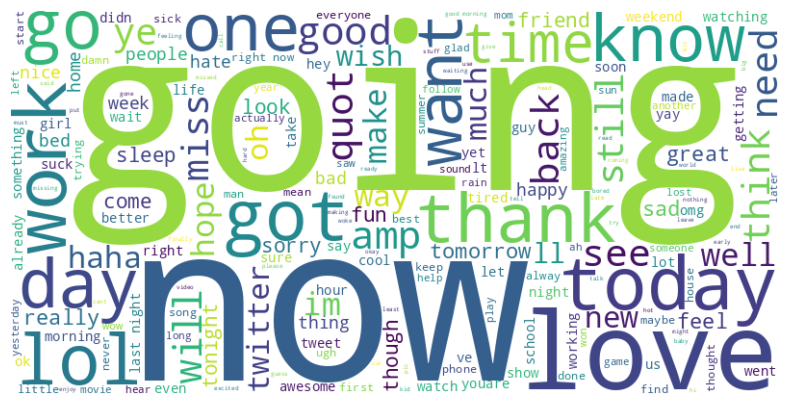

In [40]:
# Combine all text data
all_text = " ".join(df_train_preprocessed["Text"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [41]:
# Tokenize all text
tokens = word_tokenize(all_text)

# Count word frequency
word_freq = Counter(tokens)

# Convert to DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

# Display the top 50 most common words
print(word_freq_df.head(50))

      Word  Frequency
46      to      55846
68     the      49328
18      is      32668
76      it      32610
4      you      32469
22      my      29437
51     and      28571
205    not      21475
126    for      20377
12      in      20143
1       am      17514
147     of      17349
2       so      15931
137     on      15708
89    that      15695
45      me      15444
57    have      13525
54     but      12623
83      do      12461
212   just      11621
223   with      10869
110     be      10655
288     at      10316
10     was       9775
77    this       9030
255    can       8945
26     now       8754
5      are       8591
28      up       8484
74    good       8391
307    day       8150
92   going       8138
228    out       7746
262    all       7680
256    get       7580
70      no       7428
56    like       7282
171     go       6884
129    got       6741
53   today       6301
183    too       6105
106   love       6054
312   your       6005
52    work       5925
33    what

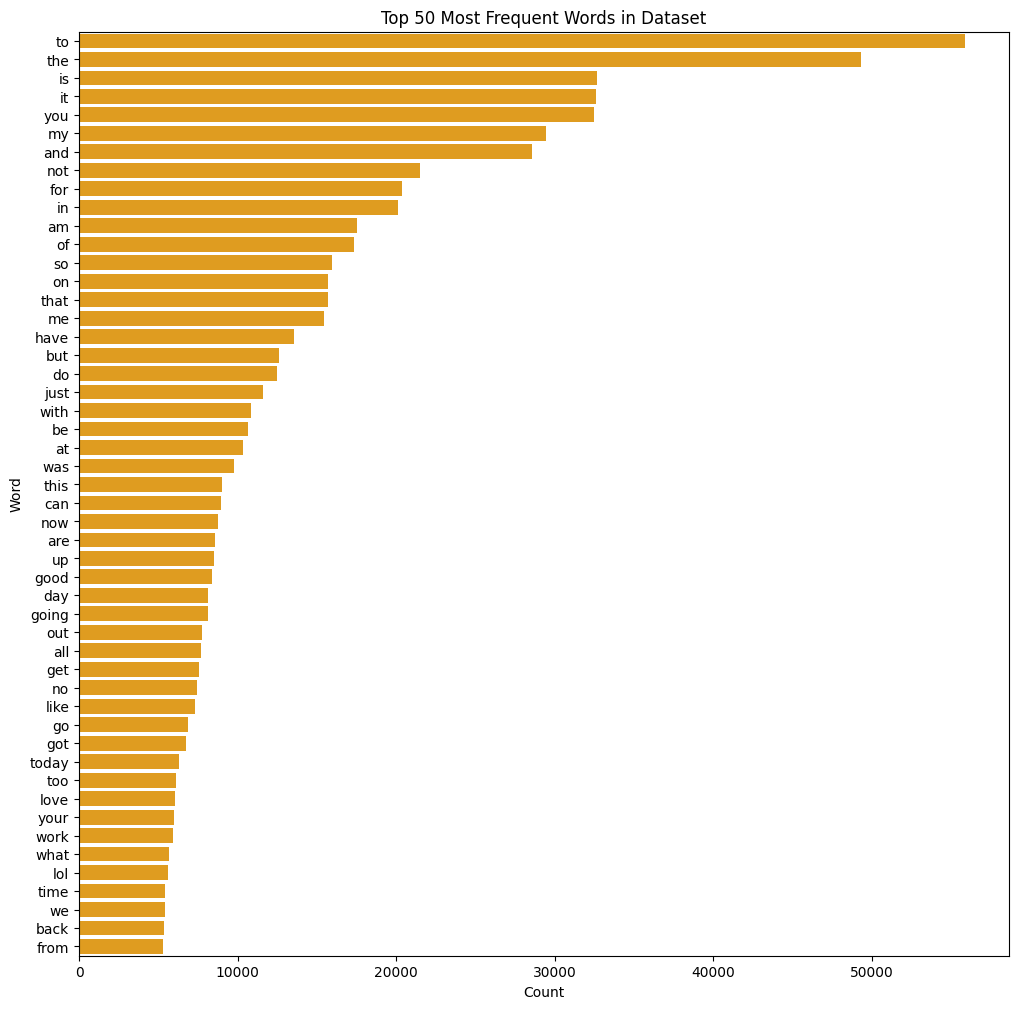

In [42]:
# Select top 50 words
top_words = word_freq_df.head(50)

plt.figure(figsize=(12, 12))
sns.barplot(x="Frequency", y="Word", data=top_words, palette=["orange"])
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Top 50 Most Frequent Words in Dataset")
plt.show()

# Validation dataset

## Create df (val)

In [43]:
df_val = pd.read_csv('/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/val_dataset.csv')
print(df_val)

           ID                                               Text  Label
0      187062  @NatexTheGreat heyheyhey maybe i will  get the...      0
1      168997  @molliesmummy Work? Work was crap. I missed yo...      0
2      194461  Want: Trip to Boston next month. Need: Addit'l...      1
3      165442                        first day starts tomorrow!       1
4       34853  @goodforyoursoul 8 course fish in Little Saigo...      1
...       ...                                                ...    ...
42391   52389  Hello people! @twitographers is back from the ...      1
42392   64308  i do not like my cooking. food taste much bett...      0
42393  199678  @Amanda_fd Yeah, one can tell what does he wan...      1
42394  118713  @pinkhibiscusoz I can't seem to DM you - they ...      0
42395   68392  @love_tracy it says it only works in the US  b...      0

[42396 rows x 3 columns]


## Preprocessing (val)

In [44]:
df_val_preprocessed = df_val.copy()
df_val_preprocessed["Text"] = df_val_preprocessed["Text"].apply(preprocess_text)
print(df_val_preprocessed)

           ID                                               Text  Label
0      187062  heyheyhey maybe will get them if could find th...      0
1      168997  work work was crap missed your condescending a...      0
2      194461  want trip to boston next month need addit moti...      1
3      165442                          first day starts tomorrow      1
4       34853  course fish in little saigon and dessert place...      1
...       ...                                                ...    ...
42391   52389  hello people is back from the break how ve you...      1
42392   64308  do not like my cooking food taste much better ...      0
42393  199678  yes one can tell what does he want without kno...      1
42394  118713  can not seem to dm you they have me doing book...      0
42395   68392     it says it only works in the us but ty anyways      0

[42396 rows x 3 columns]


In [45]:
original_max_colwidth = pd.get_option('display.max_colwidth')
pd.set_option('display.max_colwidth', None)
print(df_val_preprocessed["Text"].head(100).to_string(index=False))
pd.set_option('display.max_colwidth', original_max_colwidth)

                                                      heyheyhey maybe will get them if could find them would but cant find them rawr
                 work work was crap missed your condescending and overbearing presence it was also very busy do not care about poole
               want trip to boston next month need addit motivation to save the to do so beloved daughter wants to go with which the
                                                                                                           first day starts tomorrow
                                            course fish in little saigon and dessert place for coconut creme brulee to end the night
                                                                                   no milk for breakfast gr but looks like beach day
            am signed up to get news updates on it from the main website so ll probably be spamming whenever ever find out new stuff
                                                                     

## Exploratory Data Analysis (EDA) - val dataset

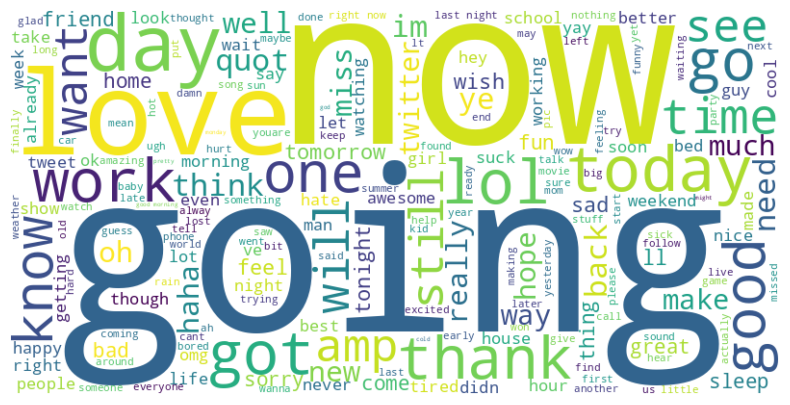

In [46]:
# Combine all text data
all_text = " ".join(df_val_preprocessed["Text"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [47]:
# Tokenize all text
tokens = word_tokenize(all_text)

# Count word frequency
word_freq = Counter(tokens)

# Convert to DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

# Display the top 50 most common words
print(word_freq_df.head(50))

      Word  Frequency
32      to      15723
40     the      14124
21      it       9421
138     is       9285
109    you       9262
104     my       8555
18     and       8041
26     not       6093
59     for       5795
54      in       5759
72      am       5078
156     of       4965
77      on       4623
41      so       4512
220   that       4468
225     me       4311
100   have       3916
9      but       3645
25      do       3529
342   just       3442
46    with       3112
83      be       3004
252     at       2910
13     was       2890
123    can       2586
95    this       2514
98    good       2459
309    are       2451
323    now       2447
49     day       2425
74      up       2356
168  going       2342
87     out       2235
193    all       2235
65      no       2228
3      get       2142
70    like       2087
45      go       1953
306    got       1868
263  today       1832
16    your       1788
343   love       1780
459    too       1749
146    lol       1644
12    work

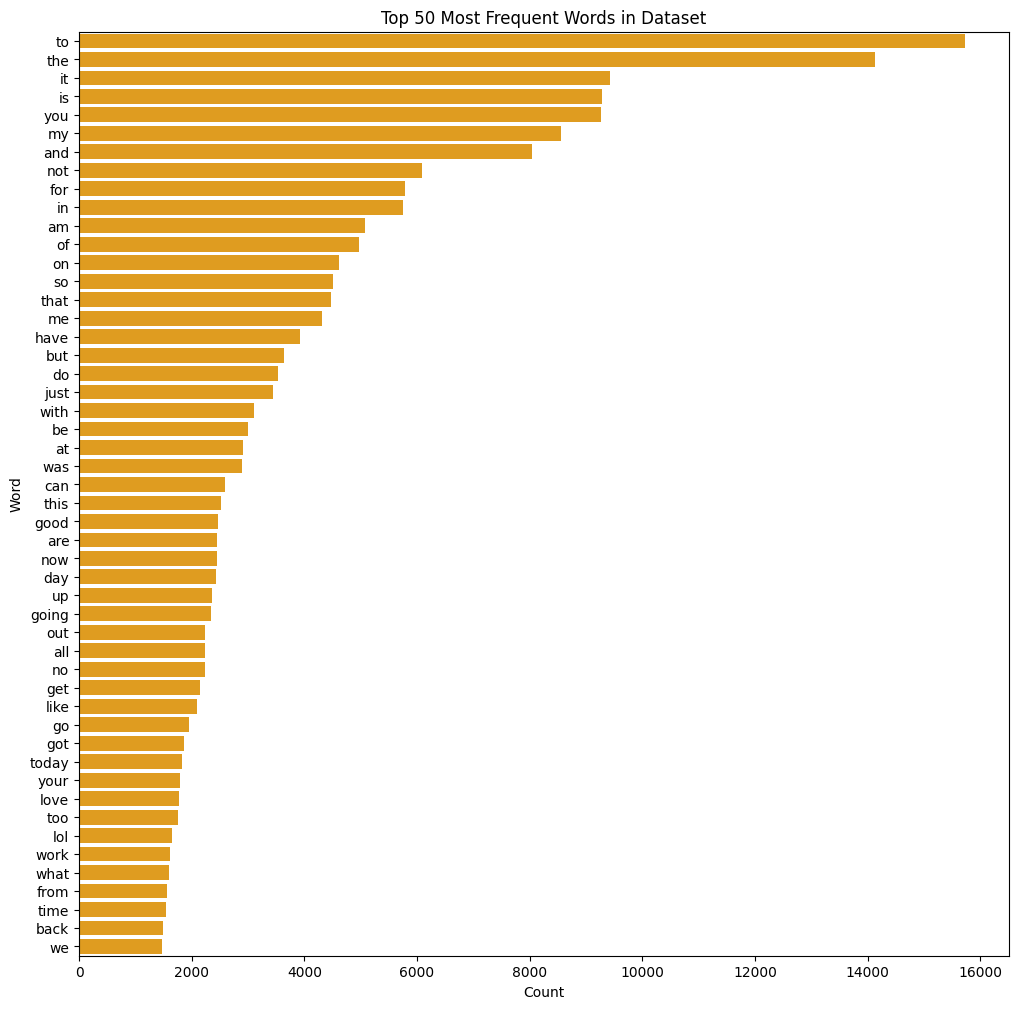

In [48]:
# Select top 50 words
top_words = word_freq_df.head(50)

plt.figure(figsize=(12, 12))
sns.barplot(x="Frequency", y="Word", data=top_words, palette=["orange"])
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Top 50 Most Frequent Words in Dataset")
plt.show()

# Test dataset

## Create df (test)

In [49]:
df_test = pd.read_csv('/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/test_dataset.csv')
print(df_test)

           ID                                               Text
0      102388  The books ARRIVED!!! Those who want a copy - w...
1      153802  @Spunk_Ransom_09 alright yea its cute. I guess...
2       61831        On the way to zen buffet! no crabs I think 
3       18317             Good Tuesday Morning All (5:20am).... 
4       50061                                        Bed timeee 
...       ...                                                ...
21194  101544  @oOogabriela can i take ur twitter education c...
21195    5461  ok so i quite like lucas till now...not a bad ...
21196  135996  @joshdoyle Going to see them on Thursday  Tooo...
21197  157554                           @Renato71 good morning! 
21198  127837  @JKeverne Ah but that's another context yet ag...

[21199 rows x 2 columns]


## Preprocessing (test)

In [50]:
df_test_preprocessed = df_test.copy()
df_test_preprocessed["Text"] = df_test_preprocessed["Text"].apply(preprocess_text)
print(df_test_preprocessed)

           ID                                               Text
0      102388  the books arrived those who want copy write to...
1      153802  alright yea it is cute guess this proves we ha...
2       61831            on the way to zen buffet no crabs think
3       18317                        good tuesday morning all am
4       50061                                           bed time
...       ...                                                ...
21194  101544  can take you are twitter education class cause...
21195    5461  ok so quite like lucas till now not bad lookin...
21196  135996           going to see them on thursday to excited
21197  157554                                       good morning
21198  127837  ah but that another context yet again looks li...

[21199 rows x 2 columns]


In [51]:
original_max_colwidth = pd.get_option('display.max_colwidth')
pd.set_option('display.max_colwidth', None)
print(df_test_preprocessed["Text"].head(100).to_string(index=False))
pd.set_option('display.max_colwidth', original_max_colwidth)

                                                                                    the books arrived those who want copy write to us asap
                                                         alright yea it is cute guess this proves we havent corrupted them all sorry spunk
                                                                                                   on the way to zen buffet no crabs think
                                                                                                               good tuesday morning all am
                                                                                                                                  bed time
                                                           german government got squezzed out by bancrupt gm billions of wrong spent money
                                                                nice seeing you guys again an la show is must gracias for being so awesome
                           

## Exploratory Data Analysis (EDA) - test dataset

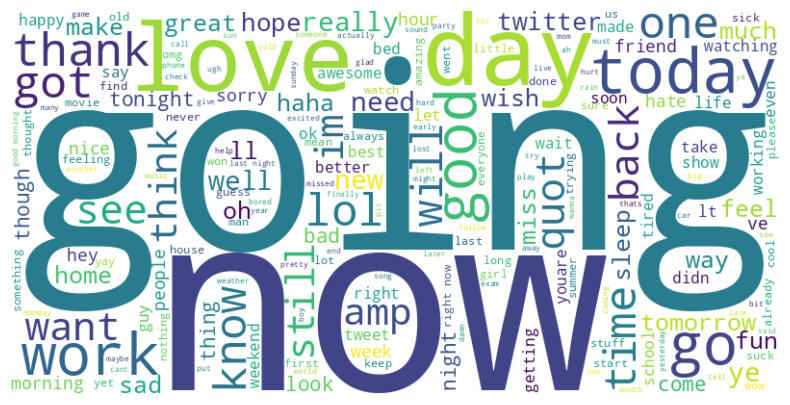

In [52]:
# Combine all text data
all_text = " ".join(df_test_preprocessed["Text"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [53]:
# Tokenize all text
tokens = word_tokenize(all_text)

# Count word frequency
word_freq = Counter(tokens)

# Convert to DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

# Display the top 50 most common words
print(word_freq_df.head(50))

      Word  Frequency
8       to       8026
0      the       7147
13      it       4729
14      is       4690
54     you       4684
141     my       4318
70     and       4147
86     not       3064
119     in       2993
62     for       2903
36      am       2538
48      of       2533
64      so       2280
26      on       2267
138   that       2186
171     me       2180
160   have       1893
190    but       1833
383     do       1772
278   just       1705
124   with       1562
195     be       1533
317     at       1502
169    was       1460
289    now       1300
66     can       1283
117    are       1248
132    day       1237
218     up       1232
33    good       1218
17    this       1193
193  going       1161
23     all       1149
293    get       1116
43     out       1095
110   like       1081
335     go       1039
30      no       1036
273  today        977
68     too        943
83    love        913
41     got        904
79    your        875
102   work        842
38    time

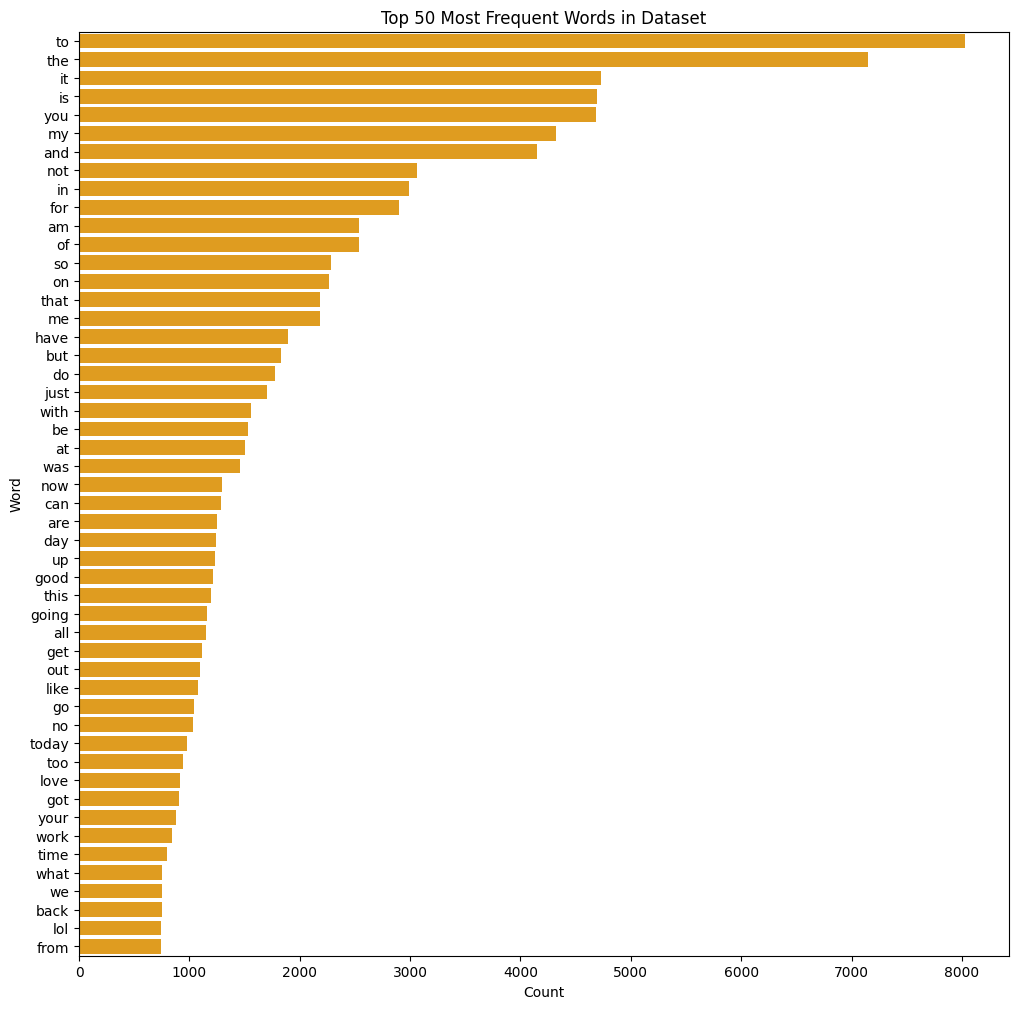

In [54]:
# Select top 50 words
top_words = word_freq_df.head(50)

plt.figure(figsize=(12, 12))
sns.barplot(x="Frequency", y="Word", data=top_words, palette=["orange"])
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Top 50 Most Frequent Words in Dataset")
plt.show()

# Get Individual columns

In [55]:
X_train = df_train_preprocessed["Text"]
y_train = df_train_preprocessed["Label"]

X_val = df_val_preprocessed["Text"]
y_val = df_val_preprocessed["Label"]

X_test = df_test_preprocessed["Text"]

# Experiment 1

- #### I began my experiments with a very simple strategy and used mostly the default values of the model.

## Accuracy exp1

In [23]:
# Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Train logistic regression model
model = LogisticRegression(max_iter=500, random_state=random_seed)
model.fit(X_train_tfidf, y_train)

# Prediction
y_pred = model.predict(X_val_tfidf)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79     21197
           1       0.79      0.80      0.79     21199

    accuracy                           0.79     42396
   macro avg       0.79      0.79      0.79     42396
weighted avg       0.79      0.79      0.79     42396



## Learning Curve exp1

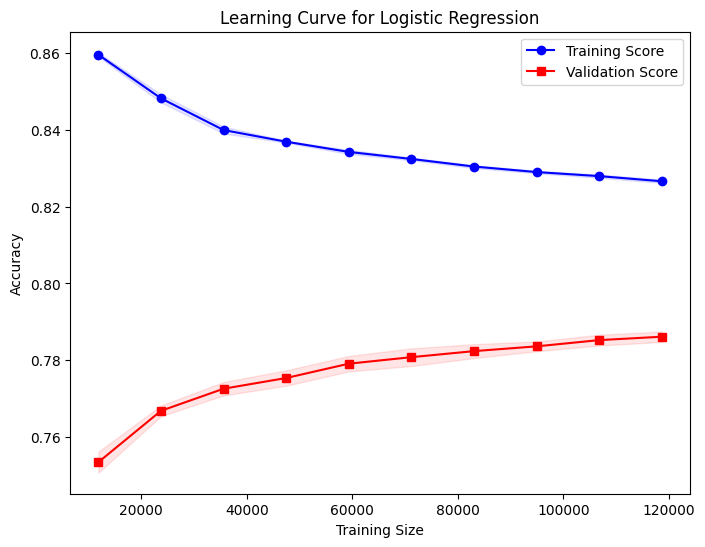

In [24]:
# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model,
    X_train_tfidf,
    y_train,
    # cv=2,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, val_mean, label="Validation Score", color="red", marker="s")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="red")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend()
plt.show()

# Experiment 2

- #### For my second experiment I only changed my vectorization approach and kept everything else the same.

## Accuracy exp2

In [25]:
# Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Train logistic regression model
model = LogisticRegression(max_iter=500, random_state=random_seed)
model.fit(X_train_tfidf, y_train)

# Prediction
y_pred = model.predict(X_val_tfidf)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80     21197
           1       0.81      0.80      0.80     21199

    accuracy                           0.80     42396
   macro avg       0.80      0.80      0.80     42396
weighted avg       0.80      0.80      0.80     42396



## Learning Curve exp2

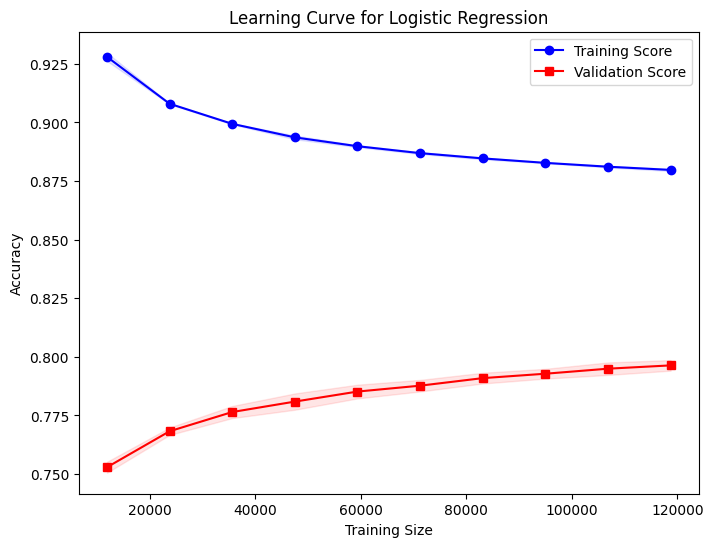

In [26]:
# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model,
    X_train_tfidf,
    y_train,
    # cv=2,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, val_mean, label="Validation Score", color="red", marker="s")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="red")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend()
plt.show()

- #### The results showed a 0.1 improvement in accuracy, for this reason the decision was made to keep this vectorization approach.

# Experiment 3

- #### My third experiment I again changed my vectorization approach and kept everything else the same.

## Accuracy exp3

In [24]:
# Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Train logistic regression model
model = LogisticRegression(max_iter=500, random_state=random_seed,  C=1.0, solver='lbfgs')
model.fit(X_train_tfidf, y_train)

# Prediction
y_pred = model.predict(X_val_tfidf)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80     21197
           1       0.81      0.78      0.79     21199

    accuracy                           0.80     42396
   macro avg       0.80      0.80      0.80     42396
weighted avg       0.80      0.80      0.80     42396



## Learning Curve exp3

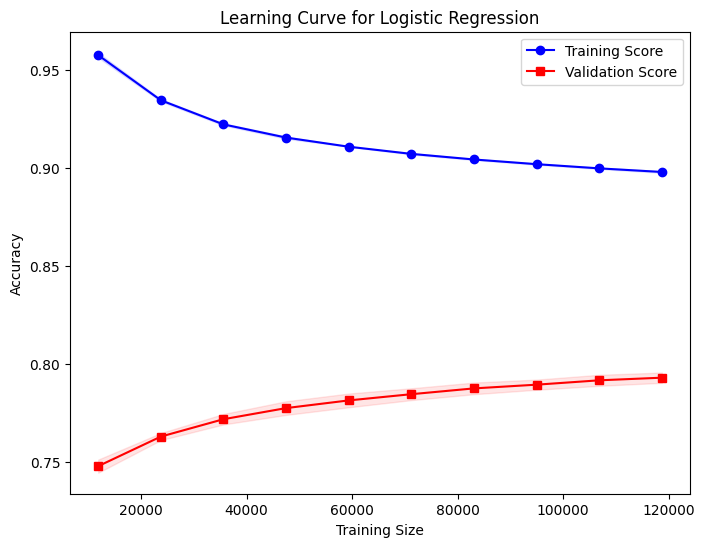

In [25]:
# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model,
    X_train_tfidf,
    y_train,
    # cv=2,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, val_mean, label="Validation Score", color="red", marker="s")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="red")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend()
plt.show()

- #### The models metrics and balance slightly declined, for this reason the following experiments and my final strategy 
  #### use the "vectorizer = TfidfVectorizer(ngram_range=(1,2))" approach for vectorization.

# Experiment 4

- #### My fourth experiment used Grid Search to find the best custom parameters from the ones given below.

## Accuracy exp4

In [26]:
# Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Set up
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga', 'sag'],
    'max_iter': [100, 500, 1000]
}
grid_search = GridSearchCV(
    LogisticRegression(random_state=random_seed),
    param_grid,
    cv=2,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit
grid_search.fit(X_train_tfidf, y_train)

# Print Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Best model and predict
model = grid_search.best_estimator_
y_pred = model.predict(X_val_tfidf)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_val, y_pred))

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'saga'}
Best Accuracy: 0.7910612718009542
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80     21197
           1       0.80      0.80      0.80     21199

    accuracy                           0.80     42396
   macro avg       0.80      0.80      0.80     42396
weighted avg       0.80      0.80      0.80     42396



## Learning Curve exp4

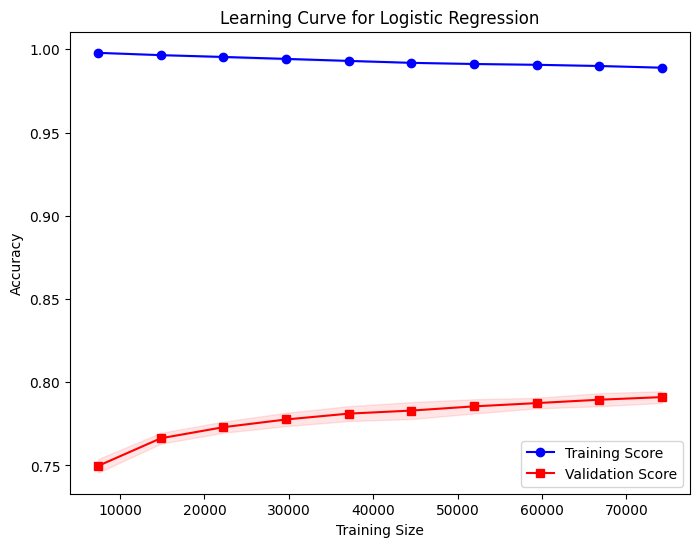

In [27]:
# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model,
    X_train_tfidf,
    y_train,
    cv=2,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, val_mean, label="Validation Score", color="red", marker="s")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="red")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend()
plt.show()

- #### This experiment had both worse metrics than experiment 2 and also suffered from overfitting.
- #### For the above reasons we consider experiment 2 as having the best results so far.

# Experiment 5

- #### The fifth experiment only changes with the fourth one at cv, specifically instead of cv=2 now it uses cv=3.

## Accuracy exp5

In [28]:
# Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Set up
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga', 'sag'],
    'max_iter': [100, 500, 1000]
}
grid_search = GridSearchCV(
    LogisticRegression(random_state=random_seed),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit
grid_search.fit(X_train_tfidf, y_train)

# Print Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Best model and predict
model = grid_search.best_estimator_
y_pred = model.predict(X_val_tfidf)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_val, y_pred))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'saga'}
Best Accuracy: 0.794275792454262
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80     21197
           1       0.80      0.80      0.80     21199

    accuracy                           0.80     42396
   macro avg       0.80      0.80      0.80     42396
weighted avg       0.80      0.80      0.80     42396



## Learning Curve exp5

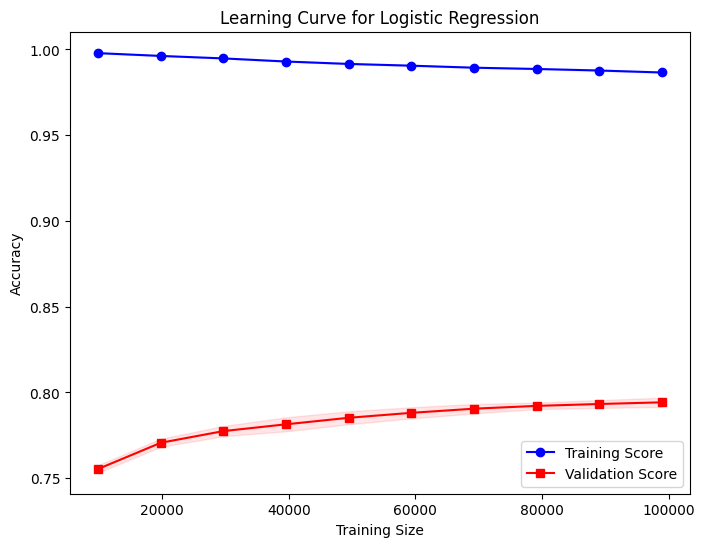

In [29]:
# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model,
    X_train_tfidf,
    y_train,
    cv=3,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, val_mean, label="Validation Score", color="red", marker="s")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="red")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend()
plt.show()

- #### This experiment choose the same best parameters as the experiment 4, for this reason we end up with the same metrics and plot and cv greater than 2 seems to not affect our results.
- #### Experiment 2, is still considered the best performing.

# Experiment 6

- #### Wanting to understand why experiment 2 is still winning, I looked into the default values of Logistic Regression.
- #### I found that it used 'lbfgs' as a solver, so for this experiment I added it to the parameter list.

## Accuracy exp6

In [30]:
# Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Set up
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear', 'saga', 'sag'],
    'max_iter': [100, 500, 1000]
}
grid_search = GridSearchCV(
    LogisticRegression(random_state=random_seed),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit
grid_search.fit(X_train_tfidf, y_train)

# Print Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Best model and predict
model = grid_search.best_estimator_
y_pred = model.predict(X_val_tfidf)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_val, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'C': 10, 'max_iter': 500, 'solver': 'lbfgs'}
Best Accuracy: 0.7942892701335199
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80     21197
           1       0.80      0.80      0.80     21199

    accuracy                           0.80     42396
   macro avg       0.80      0.80      0.80     42396
weighted avg       0.80      0.80      0.80     42396



## Learning Curve exp6

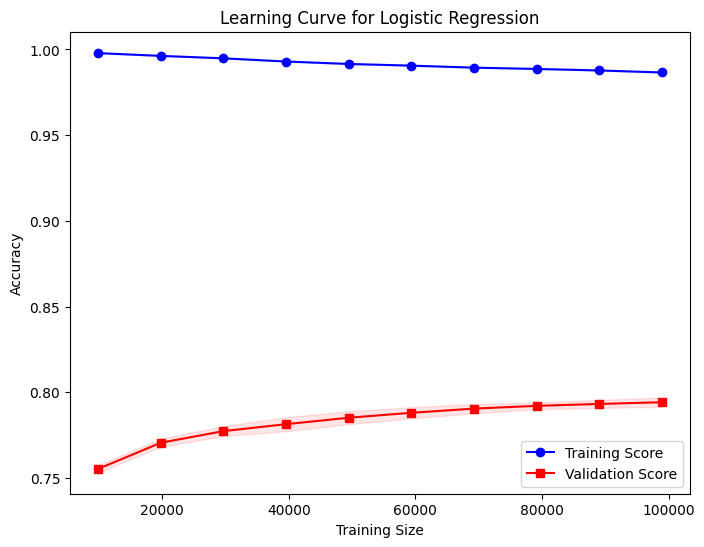

In [31]:
# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model,
    X_train_tfidf,
    y_train,
    cv=3,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, val_mean, label="Validation Score", color="red", marker="s")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="red")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend()
plt.show()

- #### This time grid search choosed almost the same parameters as experiment 2, with the only difference being the C parameter.
- #### The higher C parameter, grid search choose, is the reason why the plot shows overfitting.
- #### Experiment 2, is still considered the best performing.

# Experiment 7

- #### I tried a new approach in this experiment by removing the stop words on the parameters of experiment 2.

## Accuracy exp7

In [32]:
# Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Train logistic regression model
model = LogisticRegression(max_iter=500, random_state=random_seed,  C=1.0, solver='lbfgs')
model.fit(X_train_tfidf, y_train)

# Prediction
y_pred = model.predict(X_val_tfidf)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77     21197
           1       0.76      0.78      0.77     21199

    accuracy                           0.77     42396
   macro avg       0.77      0.77      0.77     42396
weighted avg       0.77      0.77      0.77     42396



## Learning Curve exp7

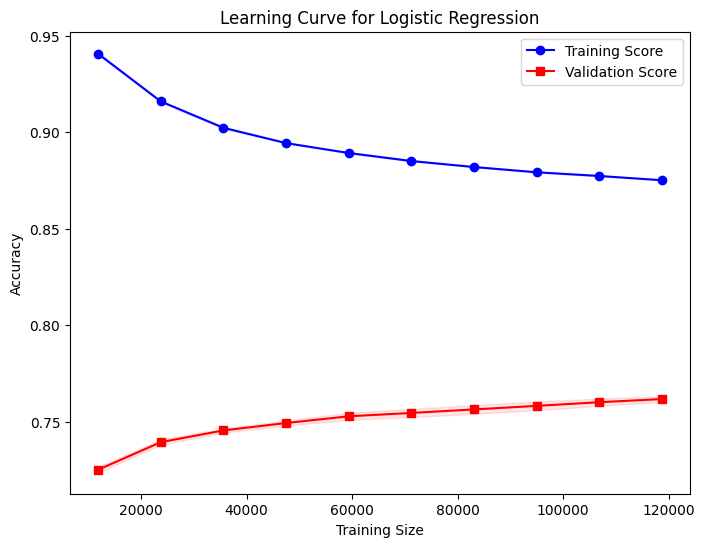

In [33]:
# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model,
    X_train_tfidf,
    y_train,
    # cv=2,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, val_mean, label="Validation Score", color="red", marker="s")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="red")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend()
plt.show()

- #### The accuracy drops by 0.03 points, so we reject this approach.
- #### Experiment 2, is still considered the best performing.

# Best Model

- #### From my experiments above it is clear that experiment 2 is the most balance and well performing of all, for this reason it is considered the best model.

## Accuracy of Best Model

In [56]:
# Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Train logistic regression model
model = LogisticRegression(max_iter=500, random_state=random_seed)
model.fit(X_train_tfidf, y_train)

# Prediction
y_pred = model.predict(X_val_tfidf)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80     21197
           1       0.81      0.80      0.80     21199

    accuracy                           0.80     42396
   macro avg       0.80      0.80      0.80     42396
weighted avg       0.80      0.80      0.80     42396



## Learning Curve of Best Model

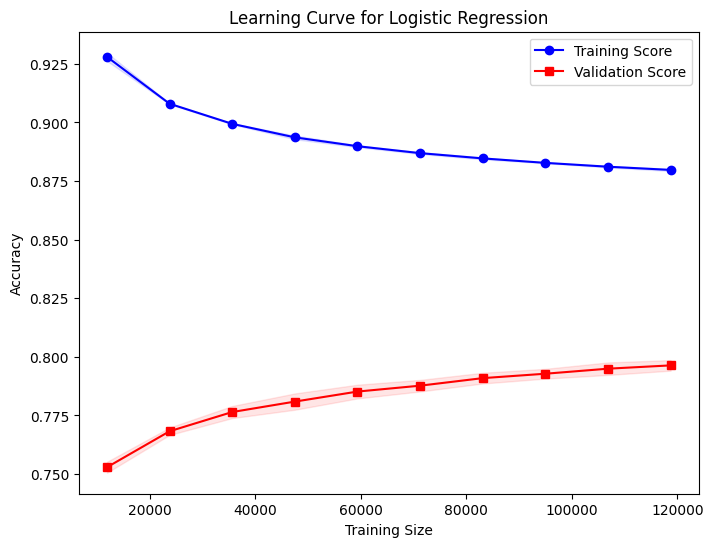

In [57]:
# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model,
    X_train_tfidf,
    y_train,
    # cv=2,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, val_mean, label="Validation Score", color="red", marker="s")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="red")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend()
plt.show()

## Confusion Matrix of Best Model

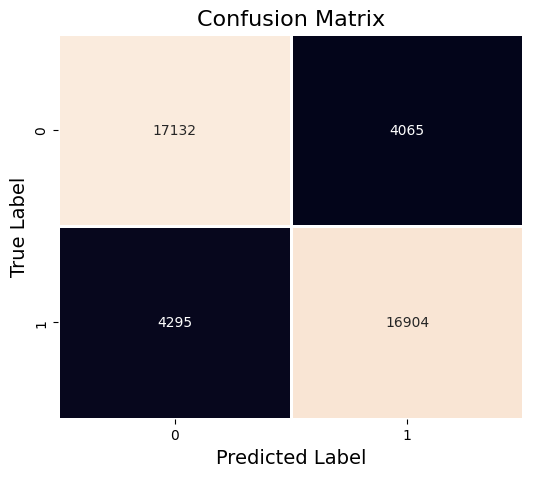

In [58]:
# Compute and generate confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, cbar=False)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()

# Generate "submission.csv"

In [59]:
# Vectorization
X_test_tfidf = vectorizer.transform(X_test)

# Prediction
y_pred_test = model.predict(X_test_tfidf)

# Create export file
df_submission = pd.DataFrame({
    "ID": df_test_preprocessed["ID"],
    "Prediction": y_pred_test
})
df_submission.to_csv("/kaggle/working/submission.csv", index=False)